In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Get project files
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [5]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(train_dir,
                                                           target_size=(IMG_WIDTH,IMG_HEIGHT),
                                                           batch_size=batch_size,class_mode = 'binary')

val_data_gen =  validation_image_generator.flow_from_directory(validation_dir,
                                                           target_size=(IMG_WIDTH,IMG_HEIGHT),
                                                           batch_size=batch_size,class_mode = 'binary')

test_data_gen =  test_image_generator.flow_from_directory(directory=PATH,
                                                           target_size=(IMG_WIDTH,IMG_HEIGHT),classes=['test'],
                                                           class_mode=None,shuffle=False,batch_size=batch_size)


Found 2001 images belonging to 2 classes.
Found 1018 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [34]:
train_image_generator = ImageDataGenerator(rescale=1./255, 
                                           shear_range=0.2,
                                           width_shift_range = 0.2,
                                           height_shift_range=0.2,
                                           zoom_range=0.2,
                                           rotation_range=360,
                                          horizontal_flip=True, 
                                           brightness_range=[0.7, 1.3],
                                           featurewise_center=True)


In [35]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                      directory=train_dir,
                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                      class_mode='binary')
sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

Found 2001 images belonging to 2 classes.


In [38]:
model = Sequential()

# add layers to model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# 8
history= model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // batch_size)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.4971 - loss: 0.7826 - val_accuracy: 0.5692 - val_loss: 0.6873
Epoch 2/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.5703 - loss: 0.6892

2024-03-23 23:41:19.863292: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5703 - loss: 0.3676 - val_accuracy: 0.6721 - val_loss: 0.3426
Epoch 3/15


2024-03-23 23:41:20.116358: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5427 - loss: 0.6842 - val_accuracy: 0.5446 - val_loss: 0.6711
Epoch 4/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.5156 - loss: 0.7121

2024-03-23 23:41:43.164329: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5156 - loss: 0.3798 - val_accuracy: 0.5984 - val_loss: 0.3286
Epoch 5/15


2024-03-23 23:41:43.409970: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5465 - loss: 0.6835 - val_accuracy: 0.5145 - val_loss: 0.7006
Epoch 6/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6172 - loss: 0.6703

2024-03-23 23:42:08.744402: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6172 - loss: 0.3575 - val_accuracy: 0.5820 - val_loss: 0.3423
Epoch 7/15


2024-03-23 23:42:08.987423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5726 - loss: 0.6684 - val_accuracy: 0.6261 - val_loss: 0.6386
Epoch 8/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6328 - loss: 0.6259

2024-03-23 23:42:32.900240: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6328 - loss: 0.3338 - val_accuracy: 0.6393 - val_loss: 0.3149
Epoch 9/15


2024-03-23 23:42:33.158189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5888 - loss: 0.6529 - val_accuracy: 0.5725 - val_loss: 0.6576
Epoch 10/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5234 - loss: 0.6887

2024-03-23 23:42:58.447018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5234 - loss: 0.3673 - val_accuracy: 0.5820 - val_loss: 0.3265
Epoch 11/15


2024-03-23 23:42:58.736223: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5890 - loss: 0.6590 - val_accuracy: 0.6027 - val_loss: 0.6438
Epoch 12/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6797 - loss: 0.6247

2024-03-23 23:43:22.802416: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6797 - loss: 0.3332 - val_accuracy: 0.6311 - val_loss: 0.3134
Epoch 13/15


2024-03-23 23:43:23.064398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5993 - loss: 0.6480 - val_accuracy: 0.6373 - val_loss: 0.6411
Epoch 14/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5859 - loss: 0.6258

2024-03-23 23:43:46.174177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5859 - loss: 0.3337 - val_accuracy: 0.6148 - val_loss: 0.3168
Epoch 15/15


2024-03-23 23:43:46.438438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6110 - loss: 0.6446 - val_accuracy: 0.6172 - val_loss: 0.6382


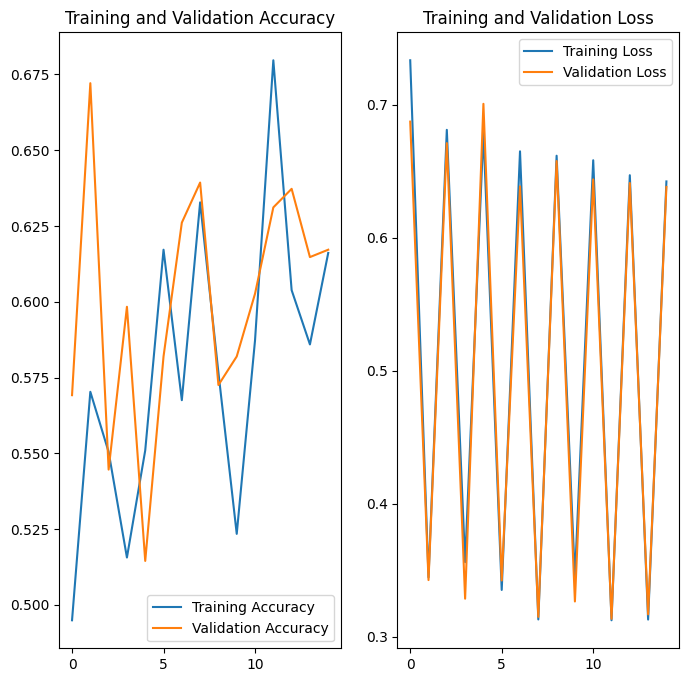

In [40]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
predictions = model.predict(test_data_gen)
sample_test_images = next(test_data_gen) # get images of batch

#plotImages(sample_test_images, predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


In [42]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0
probabilities = predictions.flatten().tolist()
for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 66.0% of the images of cats and dogs.
You passed the challenge!
